In [1]:
# %run /home/trinhlk2/libs/utils.py

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# import os
# import sys
# ROOT_PATH = '/home/trinhlk2/adhoc/Old/supership'
# os.chdir(ROOT_PATH)
# sys.path.insert(1, os.path.join(os.getcwd()  , '..'))

In [5]:
import sys
sys.path

['/home/trinhlk2/adhoc/Old/supership',
 '/opt/spark/spark-3.0.2-bin-hadoop2.7/python',
 '/opt/spark/spark-3.0.2-bin-hadoop2.7/python/lib/py4j-0.10.9-src.zip',
 '/home/trinhlk2/envs/trinhlk2-python37/lib/python37.zip',
 '/home/trinhlk2/envs/trinhlk2-python37/lib/python3.7',
 '/home/trinhlk2/envs/trinhlk2-python37/lib/python3.7/lib-dynload',
 '',
 '/home/trinhlk2/envs/trinhlk2-python37/lib/python3.7/site-packages',
 '/home/trinhlk2/envs/trinhlk2-python37/lib/python3.7/site-packages/IPython/extensions',
 '/home/trinhlk2/.ipython']

In [6]:
from scripts.utilities.helper import *
from scripts.utilities.config import *

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
# import requests
# result = requests.get('http://103.20.102.165:1235/api/v1/output/?batch=29946').json()
# result

# Processing

In [9]:
from scripts.processing.total_processing import total_processing

In [10]:
total_processing()

1. Xử lý data bảng giá cước...
>>> Done

2. Xử lý data chất lượng nội bộ Ninja Van...
Normalizing province...
Before:  713
After:  713
Normalizing district...
Before:  713
After:  713
>>> Done

3. Xử lý data kho giao nhận...
Ninja Van
Normalizing province...
Before:  536
After:  536
Normalizing district...
Before:  536
After:  536
----------------------------------------------------------------------------------------------------
GHN
Normalizing province...
Before:  1004
After:  1000
Normalizing district...
Before:  1000
After:  997
----------------------------------------------------------------------------------------------------
BEST Express
Normalizing province...
Before:  307
After:  307
Normalizing district...
Before:  307
After:  306
----------------------------------------------------------------------------------------------------
GHTK
Normalizing province...
Before:  330
After:  227
Normalizing district...
Before:  227
After:  165
---------------------------------------------

# Transform

In [11]:
from scripts.transform.total_transform import total_transform

In [12]:
(
    ngung_giao_nhan, danh_gia_zns,
    ti_le_giao_hang, chat_luong_noi_bo,
    thoi_gian_giao_hang, kho_giao_nhan,
) = total_transform(show_logs=True)

1. Transform data kho giao nhận...
Done

2. Transform data đánh giá ZNS...
Done

3. Transform data tỉ lệ giao hàng...
>>> Done

4. Transform data chất lượng nội bộ...
>>> Done

5. Transform data thời gian giao hàng toàn trình...
>>> Done

6. Transform data kho giao nhận...
>>> Done



# Data API

In [13]:
from scripts.output.out_data_api import out_data_api

In [14]:
out_data_api(return_full_cols_df=False)

1. Transform dữ liệu...
2. Tính toán quận huyện quá tải
3. Xử lý data thời gian giao dịch
4. Xủ lý score
5. Combine api data
6. Gắn thông tin quá tải
7. Thông tin nhà vận chuyển nhanh nhất, hiệu quả nhất
8. Thông tin customer_best_carrier
9. Thông tin số sao đánh giá của khách hàng
Shape:  (29946, 16)
9. Lưu dữ liệu API
>>> Done



In [15]:
data_api_df = pd.read_parquet(ROOT_PATH + '/output/data_api.parquet')
data_api_df.dtypes

receiver_province_code     object
receiver_district_code     object
carrier_id                  int64
new_type                   object
status                     object
description                object
time_data                 float64
time_display               object
speed_ranking               int64
score_ranking               int64
for_shop                    int64
total_order                 int64
rate_ranking                int64
rate                      float64
score                     float64
star                      float64
dtype: object

In [16]:
data_api_full_df = out_data_api(return_full_cols_df=True)
data_api_full_df

1. Transform dữ liệu...
2. Tính toán quận huyện quá tải
3. Xử lý data thời gian giao dịch
4. Xủ lý score
5. Combine api data
6. Gắn thông tin quá tải
7. Thông tin nhà vận chuyển nhanh nhất, hiệu quả nhất
8. Thông tin customer_best_carrier
9. Thông tin số sao đánh giá của khách hàng


,receiver_province_code,receiver_province,receiver_district_code,receiver_district,carrier_id,carrier,order_type,new_type,status,description,time_data,time_display,for_shop,speed_ranking,score_ranking,total_order,rate_ranking,rate,score,star
0,01,Thành phố Hà Nội,001,Quận Ba Đình,1,GHTK,Nội Miền,5,0,Bình thường,2.00,1.75 - 2.25 ngày,4,3,5,2,2,100.00,0.51,5.0
1,01,Thành phố Hà Nội,001,Quận Ba Đình,1,GHTK,Cận Miền,6,0,Bình thường,3.00,2.75 - 3.25 ngày,5,4,5,2,2,100.00,0.51,5.0
2,01,Thành phố Hà Nội,001,Quận Ba Đình,1,GHTK,Cách Miền,7,0,Bình thường,4.00,3.75 - 4.25 ngày,4,4,5,2,2,100.00,0.51,5.0
3,01,Thành phố Hà Nội,001,Quận Ba Đình,1,GHTK,Nội Thành Tỉnh,1,0,Bình thường,2.00,1.75 - 2.25 ngày,4,1,5,2,2,100.00,0.51,5.0
4,01,Thành phố Hà Nội,001,Quận Ba Đình,1,GHTK,Ngoại Thành Tỉnh,2,0,Bình thường,2.00,1.75 - 2.25 ngày,4,1,5,2,2,100.00,0.51,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,96,Tỉnh Cà Mau,973,Huyện Ngọc Hiển,10,SPX Express,Cách Miền,7,0,Bình thường,2.92,2.7 - 3.2 ngày,1,1,1,29,3,96.55,0.80,5.0
29942,96,Tỉnh Cà Mau,973,Huyện Ngọc Hiển,10,SPX Express,Nội Thành Tỉnh,1,0,Bình thường,2.00,1.75 - 2.25 ngày,2,1,1,29,3,96.55,0.80,5.0
29943,96,Tỉnh Cà Mau,973,Huyện Ngọc Hiển,10,SPX Express,Ngoại Thành Tỉnh,2,0,Bình thường,2.00,1.75 - 2.25 ngày,2,1,1,29,3,96.55,0.80,5.0
29944,96,Tỉnh Cà Mau,973,Huyện Ngọc Hiển,10,SPX Express,Nội Thành Tp.HCM - HN,3,0,Bình thường,2.00,1.75 - 2.25 ngày,2,1,1,29,3,96.55,0.80,5.0


# Trả kết quả API theo đơn đầu vào

In [17]:
from scripts.output.out_data_final import *

In [18]:
data_check_output = out_data_final()

Số dòng input dữ liệu:  77959
i. Tính toán order_type
ii. Gắn thông tin tính toán từ API
iii. Tính phí dịch vụ
iv. Tính ranking nhà vận chuyển theo tiêu chí rẻ nhất
v. Tính nhà vận chuyển tốt nhất cho đối tác
vi. Lưu data tính toán...
Shape:  (467754, 30)
----------------------------------------------------------------------------------------------------


# Đẩy data toàn bộ vào DB

In [19]:
from scripts.output.out_data_query_db import *

In [20]:
out_data_order_type()

1. Xử lý data phân vùng nhà vận chuyển...
2. Mapping 713 * 713 tỉnh thành, quận huyện gửi/nhận...
3. Mapping order_type...
4. Mapping system_order_type...
5. Transform data final...
6. Saving data...


In [21]:
out_data_service_fee()

Xử lý data service_fee...


## Đối chiếu câu query

In [22]:
data_api = pd.read_parquet(ROOT_PATH + '/output/data_api.parquet')
data_order_type = pd.read_parquet(ROOT_PATH + '/output/data_order_type.parquet')
service_fee = pd.read_parquet(ROOT_PATH + '/output/service_fee.parquet')

In [23]:
data_order_type.loc[
        (data_order_type['sender_province_code'] == "01") &
        (data_order_type['sender_district_code'] == "016") &
        (data_order_type['receiver_province_code'] == "77") &
        (data_order_type['receiver_district_code'] == "747")
    ]

,id,carrier_id,sender_province_code,sender_district_code,receiver_province_code,receiver_district_code,new_type,route_type
6964,6964,1,01,016,77,747,7,4
515333,515333,2,01,016,77,747,7,4
1023702,1023702,4,01,016,77,747,7,4
1532071,1532071,6,01,016,77,747,7,4
2040440,2040440,7,01,016,77,747,7,4
2548809,2548809,10,01,016,77,747,7,4


In [31]:
data_api_local = pd.read_parquet(ROOT_PATH + '/data_api.parquet')
(
    data_api_local.loc[
        (data_api_local['receiver_province_code'] == '77') &
        (data_api_local['receiver_district_code'] == '747') &
        (data_api_local['new_type'] == '7')
    ][[
        'carrier_id', 'receiver_province_code', 'receiver_district_code', 'new_type',
        'status', 'description', 'time_data', 'time_display', 'rate', 'score', 'star',
        'for_shop', 'speed_ranking', 'score_ranking', 'rate_ranking',
    ]]
)

,carrier_id,receiver_province_code,receiver_district_code,new_type,status,description,time_data,time_display,rate,score,star,for_shop,speed_ranking,score_ranking,rate_ranking
22976,1,77,747,7,0,Bình thường,3.50,3.2 - 3.8 ngày,100.00,0.57,5.0,2,2,5,2
22983,2,77,747,7,0,Bình thường,3.46,3.2 - 3.7 ngày,100.00,1.00,4.7,1,1,1,1
22990,4,77,747,7,0,Bình thường,4.11,3.9 - 4.4 ngày,90.57,0.72,4.8,6,6,4,6
22997,6,77,747,7,0,Bình thường,3.59,3.3 - 3.8 ngày,92.74,0.95,4.7,3,3,2,5
23004,7,77,747,7,0,Bình thường,3.76,3.5 - 4.0 ngày,94.62,0.84,4.7,4,4,3,4
23011,10,77,747,7,0,Bình thường,4.00,3.75 - 4.25 ngày,100.00,0.24,5.0,5,5,6,3


In [25]:
(
    data_api.loc[
        (data_api['receiver_province_code'] == '77') &
        (data_api['receiver_district_code'] == '747') &
        (data_api['new_type'] == '7')
    ][[
        'carrier_id', 'receiver_province_code', 'receiver_district_code', 'new_type',
        'status', 'description', 'time_data', 'time_display', 'rate', 'score', 'star',
        'for_shop', 'speed_ranking', 'score_ranking', 'rate_ranking',
    ]]
)

,carrier_id,receiver_province_code,receiver_district_code,new_type,status,description,time_data,time_display,rate,score,star,for_shop,speed_ranking,score_ranking,rate_ranking
22976,1,77,747,7,0,Bình thường,3.50,3.2 - 3.8 ngày,100.00,0.56,5.0,2,2,5,2
22983,2,77,747,7,0,Bình thường,3.46,3.2 - 3.7 ngày,100.00,0.98,4.7,1,1,1,1
22990,4,77,747,7,0,Bình thường,4.11,3.9 - 4.4 ngày,90.57,0.71,4.8,6,6,4,6
22997,6,77,747,7,0,Bình thường,3.99,3.7 - 4.2 ngày,92.74,0.90,4.7,4,4,2,5
23004,7,77,747,7,0,Bình thường,3.76,3.5 - 4.0 ngày,94.62,0.83,4.7,3,3,3,4
23011,10,77,747,7,0,Bình thường,4.00,3.75 - 4.25 ngày,100.00,0.25,5.0,5,5,6,3


In [27]:
final_df = (
    data_order_type.loc[
        (data_order_type['sender_province_code'] == "01") &
        (data_order_type['sender_district_code'] == "016") &
        (data_order_type['receiver_province_code'] == "77") &
        (data_order_type['receiver_district_code'] == "747")
    ][['carrier_id', 'route_type', 'receiver_province_code', 'receiver_district_code', 'new_type']].merge(
        data_api[[
            'carrier_id', 'receiver_province_code', 'receiver_district_code', 'new_type',
            'status', 'description', 'time_data', 'time_display', 'rate', 'score', 'star',
            'for_shop', 'speed_ranking', 'score_ranking', 'rate_ranking',
        ]], 
        on=['carrier_id', 'receiver_province_code', 'receiver_district_code', 'new_type'], how='inner'
    ).merge(
        service_fee, on=['carrier_id', 'new_type'], how='inner'
    )
)
final_df = final_df.loc[(final_df['weight'] == int(1200/500 + 1)*500) & (final_df['pickup'] == '1')]
final_df['price_ranking'] = final_df["price"].rank(method="dense", ascending=True).astype(int)
final_df['wscore'] = final_df['price_ranking'] * 1.4 + final_df['rate_ranking'] * 1.2 + final_df['score_ranking']
final_df["for_partner"] = final_df["wscore"].rank(method="dense", ascending=True).astype(int)

final_df = final_df[[
    'carrier_id', 'route_type', 'price', 'status', 'description',
    'time_data', 'time_display', 'rate', 'score', 'star', 'for_shop',
    'for_partner', 'price_ranking', 'speed_ranking', 'score_ranking'
]]
final_df

,carrier_id,route_type,price,status,description,time_data,time_display,rate,score,star,for_shop,for_partner,price_ranking,speed_ranking,score_ranking
102,1,4,24000,0,Bình thường,3.50,3.2 - 3.8 ngày,100.00,0.56,5.0,2,5,6,2,5
302,2,4,19000,0,Bình thường,3.46,3.2 - 3.7 ngày,100.00,0.98,4.7,1,1,4,1,1
502,4,4,21000,0,Bình thường,4.11,3.9 - 4.4 ngày,90.57,0.71,4.8,6,6,5,6,4
702,6,4,15000,0,Bình thường,3.99,3.7 - 4.2 ngày,92.74,0.90,4.7,4,2,1,4,2
902,7,4,15500,0,Bình thường,3.76,3.5 - 4.0 ngày,94.62,0.83,4.7,3,3,2,3,3
1102,10,4,18000,0,Bình thường,4.00,3.75 - 4.25 ngày,100.00,0.25,5.0,5,4,3,5,6


## Visualize

In [68]:
import matplotlib.pyplot as plt

In [31]:
data_check_output = pd.read_parquet(ROOT_PATH + '/output/data_check_output.parquet')

In [60]:
data_check_output.columns

Index(['order_code', 'sender_province_code', 'sender_province',
       'sender_district_code', 'sender_district', 'receiver_province_code',
       'receiver_province', 'receiver_district_code', 'receiver_district',
       'carrier_id', 'carrier', 'order_type', 'new_type', 'route_type',
       'weight', 'price', 'pickup_type', 'status', 'description', 'time_data',
       'time_display', 'rate', 'rate_ranking', 'for_shop', 'shop_best_carrier',
       'for_partner', 'partner_best_carrier', 'score', 'star', 'price_ranking',
       'speed_ranking', 'score_ranking'],
      dtype='object')

In [61]:
def get_data_viz(target_df, threshold=0.6):
    good_df = target_df.loc[target_df['score'] >= threshold].sort_values(['order_code', 'price']).drop_duplicates('order_code')
    bad_df = target_df.loc[target_df['score'] < threshold].sort_values(['order_code', 'price'], ascending=[True, False]).drop_duplicates('order_code')
    bad_filter_df = bad_df.loc[~bad_df['order_code'].isin(good_df['order_code'])]
    result_df = pd.concat([good_df, bad_filter_df], ignore_index=True)
    # result_df = good_df.copy()

    monetary = result_df['price'].sum()
    total_error = len(result_df.loc[result_df['status'].isin([1, 2])&(result_df['description'] != 'Không có bưu cục trong tỉnh')])
    print(
        result_df.loc[
          result_df['status'].isin([1, 2]) 
          &(result_df['description'] != 'Không có bưu cục trong tỉnh')
      ]['carrier'].value_counts()
    )
    total_order = len(result_df)
    return monetary, total_error, total_order

In [62]:
target_df = data_check_output.copy()

In [63]:
threshold_list = []
monetary_list = []
total_error_list = []
for threshold in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]:
    monetary, total_error, total_order = get_data_viz(target_df, threshold)
    print('Threshold: ', threshold, ', monetary: ', monetary, ', error: ', total_error, ', total_order: ', total_order)
    threshold_list.append(threshold)
    monetary_list.append(monetary)
    total_error_list.append(total_error)
    print('-'*100)

BEST Express    3249
Ninja Van        610
SPX Express      144
Viettel Post      82
GHN               36
Name: carrier, dtype: int64
Threshold:  0.5 , monetary:  1145858000 , error:  4121 , total_order:  77959
----------------------------------------------------------------------------------------------------
BEST Express    1780
Ninja Van        599
SPX Express      144
Viettel Post     102
GHN               24
Name: carrier, dtype: int64
Threshold:  0.55 , monetary:  1160515000 , error:  2649 , total_order:  77959
----------------------------------------------------------------------------------------------------
BEST Express    2144
Ninja Van        359
SPX Express      161
GHTK              85
GHN               84
Name: carrier, dtype: int64
Threshold:  0.6 , monetary:  1210466000 , error:  2833 , total_order:  77959
----------------------------------------------------------------------------------------------------
BEST Express    2259
Ninja Van        339
GHTK             220
GHN

In [64]:
viz_df = pd.DataFrame(data={'threshold': threshold_list, 'monetary': monetary_list, 'total_error': total_error_list})
viz_df

,threshold,monetary,total_error
0,0.50,1145858000,4121
1,0.55,1160515000,2649
2,0.60,1210466000,2833
3,0.65,1283201000,2956
4,0.70,1368460000,3241
5,0.75,1469249000,2983
6,0.80,1599274000,2394
7,0.85,1699210000,3694
8,0.90,1818242500,3486


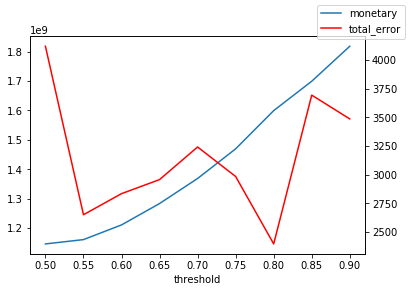

In [69]:
ax = viz_df.plot(x="threshold", y="monetary", legend=False)
ax2 = ax.twinx()
viz_df.plot(x="threshold", y="total_error", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [66]:
target_df['status'].value_counts()

0    415255
2     45029
1      7470
Name: status, dtype: int64

In [67]:
target_df.loc[(target_df['carrier'] == 'GHTK') & target_df['status'].isin([1, 2])]['description'].value_counts()

Không có bưu cục trong tỉnh                                                                        11630
Trung bình thời gian giao hàng lớn hơn hoặc bằng 120h (Nội Miền)                                     517
Trung bình thời gian giao hàng lớn hơn hoặc bằng 144h (Cận Miền)                                     419
Tổng đơn hàng từ 4 đơn trở lên và có tỷ lệ hoàn từ 50% trở lên                                       360
Tổng đơn hàng từ 4 đơn trở lên và có tỷ lệ hoàn từ 50% trở lên + Không có bưu cục trong tỉnh         357
Trung bình thời gian giao hàng lớn hơn hoặc bằng 168h (Cách Miền) + Không có bưu cục trong tỉnh      215
Trung bình thời gian giao hàng lớn hơn hoặc bằng 168h (Cách Miền)                                    154
Trung bình thời gian giao hàng lớn hơn hoặc bằng 120h (Nội Miền) + Không có bưu cục trong tỉnh       150
Trung bình thời gian giao hàng lớn hơn hoặc bằng 144h (Cận Miền) + Không có bưu cục trong tỉnh        45
Name: description, dtype: int64

## Demo 1000 KH

In [ ]:
# input_df = generate_sample_input(n_rows=1_000)
# input_df

In [47]:
# tmp_df1 = generate_order_type(input_df)
# assert len(tmp_df1) == len(input_df) * len(ACTIVE_CARRIER), 'Transform data sai'
# tmp_df1

In [48]:
# tmp_df2 = combine_info_from_api(tmp_df1)
# assert len(tmp_df2) == len(tmp_df1), 'Transform data sai'
# tmp_df2

In [49]:
# tmp_df3 = calculate_service_fee(tmp_df2)
# assert len(tmp_df3) == len(tmp_df2), 'Transform data sai'
# tmp_df3

In [50]:
# tmp_df4 = calculate_notification_v2(tmp_df3)
# assert len(tmp_df4) == len(tmp_df3), 'Transform data sai'
# tmp_df4

In [51]:
# final_df = partner_best_carrier(tmp_df4)
# assert len(final_df) == len(tmp_df4), 'Transform data sai'
# # final_df = final_df[FINAL_FULL_COLS] # FINAL_FULL_COLS_RENAMED
# final_df = final_df[FINAL_COLS] # FINAL_COLS_RENAMED
# final_df

In [52]:
# len(final_df)

## Xuất danh sách gửi Tài

In [81]:
# api_data_final = out_data_api(return_full_cols_df=True, show_logs=False)
# api_data_final

In [105]:
# data_api = pd.read_parquet(ROOT_PATH + '/output/data_api.parquet')
# test_df = data_api[['receiver_province_code', 'receiver_district_code', 'new_type']].drop_duplicates()
# test_df[['weight']] = 500
# test_df['delivery_type'] = [
#     np.random.choice(['Lấy Tận Nơi', 'Gửi Bưu Cục'])
#     for i in range(len(test_df))
# ]
# test_df['order_id'] = [
#     ''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), 4)) \
#     + ''.join(np.random.choice(list('123456789'), 6)) \
#     + ''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), 2)) \
#     + '.' 
#     + ''.join(np.random.choice(list('123456789'), 9)) \
#     for i in range(len(test_df))
# ]
# tmp_df1 = test_df.merge(pd.DataFrame(data={'carrier': ACTIVE_CARRIER}), how='cross')
# tmp_df1['carrier_id'] = tmp_df1['carrier'].map(MAPPING_CARRIER_ID)
# tmp_df1['order_type'] = tmp_df1['new_type'].map({
#     1: 'Nội Thành Tỉnh',
#     2: 'Ngoại Thành Tỉnh',
#     3: 'Nội Thành Tp.HCM - HN',
#     4: 'Ngoại Thành Tp.HCM - HN',
#     5: 'Nội Miền',
#     6: 'Cận Miền',
#     7: 'Cách Miền',
# })
# tmp_df1 = (
#     tmp_df1.merge(
#     PROVINCE_MAPPING_DISTRICT_DF.rename(columns={
#         'province_id': 'receiver_province_code',
#         'district_id': 'receiver_district_code',
#         'province': 'receiver_province',
#         'district': 'receiver_district',
#     }), on=['receiver_province_code', 'receiver_district_code'], how='left')
# )
# tmp_df1 = tmp_df1[[
#     'order_id',
#     'receiver_province_code', 'receiver_province', 'receiver_district_code', 'receiver_district', 
#     'carrier', 'carrier_id',
#     'weight', 'delivery_type',  
#     'new_type', 'order_type'
# ]]
# tmp_df1.columns = [
#     'order_id',
#     'receiver_province_id', 'receiver_province', 'receiver_district_id', 'receiver_district', 
#     'carrier', 'carrier_id',
#     'weight', 'delivery_type',  
#     'order_type_id', 'order_type'
# ]
# tmp_df1

In [106]:
# tmp_df2 = combine_info_from_api(tmp_df1)
# assert len(tmp_df2) == len(tmp_df1), 'Transform data sai'
# tmp_df2

In [107]:
# tmp_df3 = calculate_service_fee(tmp_df2)
# assert len(tmp_df3) == len(tmp_df2), 'Transform data sai'
# tmp_df3

In [108]:
# tmp_df4 = calculate_notification_v2(tmp_df3)
# assert len(tmp_df4) == len(tmp_df3), 'Transform data sai'
# tmp_df4

In [109]:
# final_df = partner_best_carrier(tmp_df4)
# assert len(final_df) == len(tmp_df4), 'Transform data sai'
# final_df['sys_order_type_id'] = 1
# final_df = final_df[FINAL_COLS + ['receiver_province_id', 'receiver_district_id', 'weight', 'delivery_type']]
# final_df

In [110]:
# final_df.to_excel(ROOT_PATH + '/output/data_29946_api_20231117.xlsx', index=False)

### Xuất data gửi SuperShip check

In [111]:
# data_check_output = out_data_final()
# data_check_output

## Test đơn

In [74]:
# cuoc_phi_df = pd.read_parquet("/home/trinhlk2/adhoc/Old/supership/processed_data/cuoc_phi.parquet")
# cuoc_phi_df['lt_or_eq'].max()

In [75]:
# order_code = 'TIWUUWJONYKD412711618'
# weight = 27600
# delivery_type = 'Lấy Tận Nơi'
# sender_province_code  = '80'
# sender_district_code  = '795'
# receiver_province_code  = '89'
# receiver_district_code  = '893'

In [76]:
# customer_best_carrier : SPX (thời gian nhanh nhất, tỉ lệ thành công 100%, score 0.73 xếp thứ 3)
# partner_best_carrier : Best (tỉ lệ giao thành công hơn 90%, score 1, rẻ nhất)

In [77]:
# customer_best_carrier: fastest_carrier_id * 1.4 + delivery_success_rate_id * 1.2 + highest_score_carrier_id
# partner_best_carrier: cheapest_carrier_id * 1.4 + delivery_success_rate_id * 1.2 + highest_score_carrier_id

In [78]:
# Yểu tố quá tải tích hợp trong score
# Yếu tố giá tách ra khỏi score (done)

In [68]:
final_df.loc[final_df['order_id'] == 'BDGS101316LM.811019168'][[
    # 'order_id', 
    # 'receiver_province_id', 'receiver_district_id', 'order_type_id',
    'carrier_id', 'carrier', 'service_fee', 'carrier_status_comment', 
    'estimate_delivery_time_details','delivery_success_rate_id', 
    'customer_best_carrier', 'partner_best_carrier', 
    # 'customer_best_carrier_id', 'partner_best_carrier_id', 
    'cheapest_carrier_id', 'fastest_carrier_id', 'highest_score_carrier_id',
    'score'
]]

,carrier_id,carrier,service_fee,carrier_status_comment,estimate_delivery_time_details,delivery_success_rate_id,customer_best_carrier,partner_best_carrier,cheapest_carrier_id,fastest_carrier_id,highest_score_carrier_id,score
238784,7,Ninja Van,16500,Tổng đơn hàng từ 4 đơn trở lên và có tỷ lệ hoàn từ 50% trở lên + Trung bình thời gian giao hàng lớn hơn hoặc bằng 120h (Nội Miền),3.00,5,SPX Express,BEST Express,2,6,6,0.00
238883,10,SPX Express,18000,Bình thường,2.25,2,SPX Express,BEST Express,3,1,4,0.72
238925,1,GHTK,24000,Bình thường,2.42,2,SPX Express,BEST Express,6,3,5,0.61
238959,6,BEST Express,15000,Bình thường,2.81,4,SPX Express,BEST Express,1,5,1,1.00
239036,2,GHN,19000,1 sao & Nhân viên không nhiệt tình,2.35,3,SPX Express,BEST Express,4,2,2,0.84
239116,4,Viettel Post,21000,Bình thường,2.60,1,SPX Express,BEST Express,5,4,3,0.74


In [69]:
data_api_df = pd.read_parquet(ROOT_PATH + '/output/data_api.parquet')
data_api_df.loc[
    (data_api_df['receiver_province_id'] == '74')
    &(data_api_df['receiver_district_id'] == '725') 
    &(data_api_df['order_type_id'] == 6)
][['carrier_id', 'delivery_success_rate', 'total_order']]

,carrier_id,delivery_success_rate,total_order
22434,1,100.00,12
22435,2,98.85,87
22436,4,100.00,18
22437,6,90.74,540
22438,7,41.67,36
22439,10,100.00,12


In [75]:
data_api_df['carrier_id'].values[0]

1

In [70]:
# final_df[API_COLS]

In [71]:
final_df.loc[final_df['order_id'] == 'BDGS102433NM.810895527'][[
    # 'order_id', 
    # 'receiver_province_id', 'receiver_district_id', 'order_type_id',
    'carrier_id', 'carrier', 'service_fee', 'carrier_status_comment', 
    'estimate_delivery_time_details','delivery_success_rate_id', 
    'customer_best_carrier', 'partner_best_carrier', 
    # 'customer_best_carrier_id', 'partner_best_carrier_id', 
    'cheapest_carrier_id', 'fastest_carrier_id', 'highest_score_carrier_id',
    'score'
]]

,carrier_id,carrier,service_fee,carrier_status_comment,estimate_delivery_time_details,delivery_success_rate_id,customer_best_carrier,partner_best_carrier,cheapest_carrier_id,fastest_carrier_id,highest_score_carrier_id,score
15111,1,GHTK,24000,Bình thường,2.00,2,BEST Express,BEST Express,6,3,5,0.61
15409,2,GHN,18000,1 sao & Nhân viên không nhiệt tình,2.24,3,BEST Express,BEST Express,4,4,2,0.84
15703,4,Viettel Post,21000,Bình thường,2.31,1,BEST Express,BEST Express,5,5,3,0.74
16039,6,BEST Express,15000,Bình thường,1.62,4,BEST Express,BEST Express,2,1,1,1.00
16329,7,Ninja Van,13000,Tổng đơn hàng từ 4 đơn trở lên và có tỷ lệ hoàn từ 50% trở lên + Trung bình thời gian giao hàng lớn hơn hoặc bằng 120h (Nội Miền),8.68,5,BEST Express,BEST Express,1,6,6,0.00
16608,10,SPX Express,16000,Bình thường,1.82,2,BEST Express,BEST Express,3,2,4,0.72


In [72]:
data_api_df = pd.read_parquet(ROOT_PATH + '/output/data_api.parquet')
data_api_df.loc[
    (data_api_df['receiver_province_id'] == '74')
    &(data_api_df['receiver_district_id'] == '725') 
    &(data_api_df['order_type_id'] == 5)
][['carrier_id', 'delivery_success_rate', 'total_order']]

,carrier_id,delivery_success_rate,total_order
22428,1,100.00,12
22429,2,98.85,87
22430,4,100.00,18
22431,6,90.74,540
22432,7,41.67,36
22433,10,100.00,12


## Test

In [24]:
giao_dich_valid = pd.read_parquet(ROOT_PATH + '/processed_data/giao_dich_combine_valid.parquet')
giao_dich_valid = giao_dich_valid[[
    'order_id', 'weight', 'delivery_type', 'sender_province', 'sender_district',
    'receiver_province', 'receiver_district'
]]
input_df = (
    giao_dich_valid.merge(
        PROVINCE_MAPPING_DISTRICT_DF.rename(columns={
            'province_id': 'sender_province_id',
            'district_id': 'sender_district_id',
            'province': 'sender_province',
            'district': 'sender_district'
        }), on=['sender_province', 'sender_district'], how='left')
        .merge(
        PROVINCE_MAPPING_DISTRICT_DF.rename(columns={
            'province_id': 'receiver_province_id',
            'district_id': 'receiver_district_id',
            'province': 'receiver_province',
            'district': 'receiver_district',
        }), on=['receiver_province', 'receiver_district'], how='left')
)

input_df = input_df[[
    'order_id', 'weight', 'delivery_type', 'sender_province_id', 'sender_district_id',
    'receiver_province_id', 'receiver_district_id'
]]
input_df['delivery_type'] = input_df['delivery_type'].fillna('Gửi Bưu Cục')

assert len(giao_dich_valid) == len(input_df), 'Transform data sai'
print('Số dòng: ', len(input_df))

Số dòng:  77959


In [25]:
tmp_df1 = generate_order_type(input_df)
assert len(tmp_df1) == len(input_df) * len(ACTIVE_CARRIER), 'Transform data sai'

In [26]:
tmp_df2 = combine_info_from_api(tmp_df1)
assert len(tmp_df2) == len(tmp_df1), 'Transform data sai'

In [28]:
cuoc_phi_df = pd.read_parquet('./processed_data/cuoc_phi.parquet')
cuoc_phi_df = cuoc_phi_df[['carrier', 'order_type', 'gt', 'lt_or_eq', 'service_fee']]
cuoc_phi_df[['carrier', 'order_type']].drop_duplicates().shape

(42, 2)

In [29]:
result_df = tmp_df2.merge(cuoc_phi_df, on=['carrier', 'order_type'], how='inner')
len(result_df)

46775400

In [30]:
result_df1 = result_df.loc[
    (result_df['weight'] > result_df['gt']) &
    (result_df['weight'] <= result_df['lt_or_eq'])
]
len(result_df1)

467676

In [31]:
77959 * 6

467754

In [59]:
tmp_df3 = calculate_service_fee(tmp_df2)
len(tmp_df3)

467689

In [60]:
tmp_df3.isna().sum()

order_id                          0
weight                            0
delivery_type                     0
sender_province_id                0
sender_district_id                0
receiver_province_id              0
receiver_district_id              0
carrier                           0
carrier_id                        0
sender_province                   0
sender_district                   0
receiver_province                 0
receiver_district                 0
order_type                        0
order_type_id                     0
sys_order_type_id                 0
carrier_status                    0
estimate_delivery_time_details    0
estimate_delivery_time            0
customer_best_carrier             0
delivery_success_rate             0
score                             0
stars                             0
total_order                       0
service_fee                       0
dtype: int64

In [61]:
tmp_df4 = calculate_notification(tmp_df3)
assert len(tmp_df4) == len(tmp_df3), 'Transform data sai'

In [62]:
tmp_df4.isna().sum()

order_id                          0
service_fee                       0
notification                      0
weight                            0
delivery_type                     0
sender_province_id                0
sender_district_id                0
receiver_province_id              0
receiver_district_id              0
carrier                           0
carrier_id                        0
sender_province                   0
sender_district                   0
receiver_province                 0
receiver_district                 0
order_type                        0
order_type_id                     0
sys_order_type_id                 0
carrier_status                    0
estimate_delivery_time_details    0
estimate_delivery_time            0
customer_best_carrier             0
delivery_success_rate             0
score                             0
stars                             0
total_order                       0
dtype: int64

In [63]:
partner_best_carrier_df = partner_best_carrier(tmp_df4)

final_df = (
tmp_df4.merge(
    partner_best_carrier_df,
    on=['receiver_province', 'receiver_district', 'order_type'],
    how='inner'
)
)
assert len(final_df) == len(tmp_df4), 'Transform data sai'

final_df = final_df[[
'order_id',
'sender_province_id', 'sender_province', 'sender_district_id', 'sender_district',
'receiver_province_id', 'receiver_province', 'receiver_district_id', 'receiver_district',
'carrier_id', 'carrier', 'order_type', 'order_type_id', 'sys_order_type_id',
'weight', 'service_fee', 'delivery_type',
'carrier_status', 'estimate_delivery_time_details', 'estimate_delivery_time', 'delivery_success_rate',
'customer_best_carrier', 'partner_best_carrier', 'score', 'stars', 'notification',
]]

In [64]:
len(final_df)

467689

# Check output

In [13]:
data_api_df = pd.read_parquet(ROOT_PATH + '/output/data_api.parquet')
# data_full_df = pd.read_parquet(ROOT_PATH + '/output/data_full.parquet')

In [136]:
## Vẫn còn nhiều khu vực có total_order == 0, tăng số ngày lấy data
data_api_df.loc[data_api_df['total_order'] == 0].shape[0], len(data_api_df)

(4802, 29946)

In [137]:
data_api_df['total_order'].max()

730

In [138]:
# đưa vào tính toán API trong trường hợp này là 730 đơn
data_api_df.loc[data_api_df['total_order'] == data_api_df['total_order'].max()]

,receiver_province_id,receiver_province,receiver_district_id,receiver_district,carrier_id,carrier,order_type,order_type_id,carrier_status,estimate_delivery_time_details,total_order,estimate_delivery_time,delivery_success_rate,score,stars
24213,79,Thành phố Hồ Chí Minh,785,Huyện Bình Chánh,6,BEST Express,Nội Miền,5,Bình thường,2.37,730,2.5 - 3.0 ngày,88.08,1.0,5
24214,79,Thành phố Hồ Chí Minh,785,Huyện Bình Chánh,6,BEST Express,Cận Miền,6,Bình thường,2.94,730,3.0 - 3.5 ngày,88.08,1.0,5
24215,79,Thành phố Hồ Chí Minh,785,Huyện Bình Chánh,6,BEST Express,Cách Miền,7,Bình thường,3.72,730,4.0 - 4.5 ngày,88.08,1.0,5
24216,79,Thành phố Hồ Chí Minh,785,Huyện Bình Chánh,6,BEST Express,Nội Thành Tỉnh,1,Bình thường,2.00,730,2.0 - 2.5 ngày,88.08,1.0,5
24217,79,Thành phố Hồ Chí Minh,785,Huyện Bình Chánh,6,BEST Express,Ngoại Thành Tỉnh,2,Bình thường,2.00,730,2.0 - 2.5 ngày,88.08,1.0,5
24218,79,Thành phố Hồ Chí Minh,785,Huyện Bình Chánh,6,BEST Express,Nội Thành Tp.HCM - HN,3,Bình thường,2.00,730,2.0 - 2.5 ngày,88.08,1.0,5
24219,79,Thành phố Hồ Chí Minh,785,Huyện Bình Chánh,6,BEST Express,Ngoại Thành Tp.HCM - HN,4,Bình thường,1.58,730,2.0 - 2.5 ngày,88.08,1.0,5


In [139]:
# tiêu chí lọc lấy 730 đơn trong case này
# đơn tính đối với thời gian giao hàng toàn trình lọc thêm 2 tiêu chí 
# (lấy giao dịch thành công + lấy giao dịch có ngày bắt đầu và kết thúc đơn)
giao_dich_valid = pd.read_parquet(ROOT_PATH + '/processed_data/giao_dich_combine_valid.parquet')
giao_dich_valid.loc[
    (giao_dich_valid['receiver_province'] == 'Thành phố Hồ Chí Minh')
    &(giao_dich_valid['receiver_district'] == 'Huyện Bình Chánh')
    &(giao_dich_valid['carrier'] == 'BEST Express')
    # &(giao_dich_valid['order_type'] == 'Ngoại Thành Tp.HCM - HN')
# lấy giao dịch thành công
    # &(giao_dich_valid['order_status'].isin([
    #     'Giao hàng thành công',
    #     'Đã hoàn thành',
    #     'Delivered | Giao hàng thành công',
    #     'Thành công - Phát thành công',
    #     'Đã giao hàng/Chưa đối soát',
    #     'Đã đối soát',
    # ]))
# lấy giao dịch có ngày bắt đầu và kết thúc đơn
    # &giao_dich_valid['finished_at'].notna() 
    # & giao_dich_valid['carrier_created_at'].notna()
].shape

(730, 16)

In [141]:
# Chọn khu vực có ngưỡng 5 đơn trở lên

In [142]:
(
    ngung_giao_nhan, danh_gia_zns,
    ti_le_giao_hang, chat_luong_noi_bo,
    thoi_gian_giao_hang, kho_giao_nhan,
    tien_giao_dich
) = total_transform()

1. Transform data kho giao nhận...
Done

2. Transform data đánh giá ZNS...
Done

3. Transform data tỉ lệ giao hàng...
>>> Done

4. Transform data chất lượng nội bộ...
1. Loading dữ liệu...
2. Mapping status và score...
3. Filling giá trị mặc định...
>>> Done

5. Transform data thời gian giao hàng toàn trình...
>>> Done

6. Transform data kho giao nhận...
>>> Done

7. Transform data tiền giao dịch...
>>> Done



## Check matching số liệu

In [152]:
data_api_df.loc[
    (data_api_df['receiver_province'] == 'Thành phố Hà Nội')
    &(data_api_df['receiver_district'] == 'Quận Ba Đình')
    &(data_api_df['order_type'] == 'Nội Miền')
]

,receiver_province_id,receiver_province,receiver_district_id,receiver_district,carrier_id,carrier,order_type,order_type_id,carrier_status,estimate_delivery_time_details,total_order,estimate_delivery_time,delivery_success_rate,score,stars
0,01,Thành phố Hà Nội,001,Quận Ba Đình,1,GHTK,Nội Miền,5,Bình thường,2.00,2,2.0 - 2.5 ngày,100.00,0.51,4
7,01,Thành phố Hà Nội,001,Quận Ba Đình,2,GHN,Nội Miền,5,Bình thường,2.00,11,2.0 - 2.5 ngày,90.91,0.66,4
14,01,Thành phố Hà Nội,001,Quận Ba Đình,4,Viettel Post,Nội Miền,5,Bình thường,2.92,13,3.0 - 3.5 ngày,100.00,0.65,4
21,01,Thành phố Hà Nội,001,Quận Ba Đình,6,BEST Express,Nội Miền,5,Bình thường,1.58,212,2.0 - 2.5 ngày,88.68,1.00,5
28,01,Thành phố Hà Nội,001,Quận Ba Đình,7,Ninja Van,Nội Miền,5,Bình thường,2.00,34,2.0 - 2.5 ngày,97.06,0.69,4
35,01,Thành phố Hà Nội,001,Quận Ba Đình,10,SPX Express,Nội Miền,5,Bình thường,1.99,7,2.0 - 2.5 ngày,71.43,0.47,3


In [162]:
# case ở hình dưới
# có 34 đơn, 33/34 giao thành công (97.06%)
# estimate_delivery_time_details chỉ tính theo đơn nội miền (vì nó có 4 cấp)
# Trong 34 đơn chỉ có duy nhất 1 đơn nội miền, 0 đơn hợp lệ (1 đơn bị loại do không có finished_at)
# Lấy các giá trị mặc định cho estimate_delivery_time_details, estimate_delivery_time

giao_dich_valid.loc[
    (giao_dich_valid['receiver_province'] == 'Thành phố Hà Nội')
    &(giao_dich_valid['receiver_district'] == 'Quận Ba Đình')
    &(giao_dich_valid['carrier'] == 'Ninja Van')
]

,carrier_created_at,order_id,carrier,weight,sender_province,sender_district,receiver_province,receiver_district,order_status,order_type,order_type_id,sys_order_type_id,n_deliveries,delivery_type,is_returned,finished_at
40342,2023-06-29 18:22:49,HNIS872308NT.810972383,Ninja Van,560,Thành phố Hà Nội,Quận Bắc Từ Liêm,Thành phố Hà Nội,Quận Ba Đình,Đã hoàn thành,Nội Thành Tp.HCM - HN,3,1,1,Gửi Bưu Cục,False,2023-07-01 11:05:26
41815,2023-06-30 15:57:59,HNIS325792LM.810981170,Ninja Van,1242,Tỉnh Gia Lai,Huyện Đăk Đoa,Thành phố Hà Nội,Quận Ba Đình,Giao hàng thành công,Cận Miền,6,4,1,Gửi Bưu Cục,False,2023-07-03 12:29:49
41838,2023-06-30 15:02:34,HNIS325792LM.810980267,Ninja Van,1270,Tỉnh Gia Lai,Huyện Đăk Đoa,Thành phố Hà Nội,Quận Ba Đình,Giao hàng thành công,Cận Miền,6,4,1,Gửi Bưu Cục,False,2023-07-03 10:44:49
42261,2023-06-28 14:46:16,HNIS904491LV.810965009,Ninja Van,760,Thành phố Hồ Chí Minh,Quận Gò Vấp,Thành phố Hà Nội,Quận Ba Đình,Giao hàng thành công,Cách Miền,7,2,1,Gửi Bưu Cục,False,2023-07-03 09:08:01
42873,2023-06-30 18:40:03,HNIS801177NT.810980169,Ninja Van,590,Thành phố Hà Nội,Huyện Đan Phượng,Thành phố Hà Nội,Quận Ba Đình,Đã hoàn thành,Nội Thành Tp.HCM - HN,3,1,3,Gửi Bưu Cục,False,2023-07-03 17:53:48
43029,2023-06-30 13:34:57,HNIS973520NT.810978813,Ninja Van,1830,Thành phố Hà Nội,Quận Cầu Giấy,Thành phố Hà Nội,Quận Ba Đình,Đã hoàn thành,Nội Thành Tp.HCM - HN,3,1,2,Gửi Bưu Cục,False,2023-07-03 10:42:17
43576,2023-07-03 17:13:17,HNIS973520NT.811004477,Ninja Van,500,Thành phố Hà Nội,Quận Cầu Giấy,Thành phố Hà Nội,Quận Ba Đình,Giao hàng thành công,Nội Thành Tp.HCM - HN,3,1,1,Gửi Bưu Cục,False,2023-07-04 10:16:21
45017,2023-07-04 17:15:28,HNIS973520NT.811012414,Ninja Van,500,Thành phố Hà Nội,Quận Cầu Giấy,Thành phố Hà Nội,Quận Ba Đình,Giao hàng thành công,Nội Thành Tp.HCM - HN,3,1,1,Gửi Bưu Cục,False,2023-07-05 10:03:01
45019,2023-07-04 17:15:28,HNIS973520NT.811012399,Ninja Van,500,Thành phố Hà Nội,Quận Cầu Giấy,Thành phố Hà Nội,Quận Ba Đình,Giao hàng thành công,Nội Thành Tp.HCM - HN,3,1,1,Gửi Bưu Cục,False,2023-07-05 12:10:21
45319,2023-07-04 12:34:41,HNIS973520NT.811008993,Ninja Van,500,Thành phố Hà Nội,Quận Cầu Giấy,Thành phố Hà Nội,Quận Ba Đình,Đã hoàn thành,Nội Thành Tp.HCM - HN,3,1,1,Gửi Bưu Cục,False,2023-07-05 11:11:57


In [154]:
# case ở hình dưới
# có 7 đơn, 5/7 giao thành công (71.43%)
# estimate_delivery_time_details chỉ tính theo đơn nội miền (vì nó có 4 cấp)
# có 3 đơn nội miền, 1 đơn hợp lệ (2 đơn bị loại do không có finished_at)
# lấy delta_time ~1.99 ngày

giao_dich_valid.loc[
    (giao_dich_valid['receiver_province'] == 'Thành phố Hà Nội')
    &(giao_dich_valid['receiver_district'] == 'Quận Ba Đình')
    &(giao_dich_valid['carrier'] == 'SPX Express')
]

,carrier_created_at,order_id,carrier,weight,sender_province,sender_district,receiver_province,receiver_district,order_status,order_type,order_type_id,sys_order_type_id,n_deliveries,delivery_type,is_returned,finished_at
70722,2023-07-02 10:13:03,HNIS298117LV.810992841,SPX Express,10,Thành phố Hồ Chí Minh,Quận Tân Phú,Thành phố Hà Nội,Quận Ba Đình,Delivered | Giao hàng thành công,Cách Miền,7,2,2,Lấy Tận Nơi,False,2023-07-05 13:38:11
71071,2023-07-01 13:18:26,HNIS551164NM.810987207,SPX Express,500,Tỉnh Thanh Hóa,Huyện Nga Sơn,Thành phố Hà Nội,Quận Ba Đình,Returned | Trả hàng thành công,Nội Miền,5,3,1,Lấy Tận Nơi,False,NaT
71867,2023-06-27 12:02:12,HNIS551164NM.810955854,SPX Express,500,Tỉnh Thanh Hóa,Huyện Nga Sơn,Thành phố Hà Nội,Quận Ba Đình,Returned | Trả hàng thành công,Nội Miền,5,3,1,Lấy Tận Nơi,False,NaT
73030,2023-07-05 14:09:23,HNIS551164NM.811018030,SPX Express,500,Tỉnh Thanh Hóa,Huyện Nga Sơn,Thành phố Hà Nội,Quận Ba Đình,Delivered | Giao hàng thành công,Nội Miền,5,3,2,Lấy Tận Nơi,False,2023-07-07 13:55:17
73188,2023-07-04 17:21:23,HNIS285335NT.811006621,SPX Express,1000,Thành phố Hà Nội,Huyện Thanh Oai,Thành phố Hà Nội,Quận Ba Đình,Delivered | Giao hàng thành công,Nội Thành Tp.HCM - HN,3,1,1,Lấy Tận Nơi,False,2023-07-07 11:22:12
73565,2023-07-02 16:33:35,HNIS298117LV.810995575,SPX Express,10,Thành phố Hồ Chí Minh,Quận Tân Phú,Thành phố Hà Nội,Quận Ba Đình,Delivered | Giao hàng thành công,Cách Miền,7,2,1,Lấy Tận Nơi,False,2023-07-07 11:32:40
74756,2023-07-08 17:01:34,HNIS962775LV.811044163,SPX Express,100,Thành phố Hồ Chí Minh,Quận Tân Phú,Thành phố Hà Nội,Quận Ba Đình,Delivered | Giao hàng thành công,Cách Miền,7,2,1,Lấy Tận Nơi,False,2023-07-12 13:15:33


In [156]:
# customer_best_carrier: Trả về nhà vận chuyển tốt nhất cho khách hàng
## Hiệu quả nhất: tính threshold dựa vào 2 khía cạnh:
## Khách hàng: giao nhanh và tỉ lệ giao hàng thành công cao => define công thức tính ra con số threshold

In [157]:
data_api_df.loc[
    (data_api_df['receiver_province'] == 'Thành phố Hà Nội')
    &(data_api_df['receiver_district'] == 'Quận Ba Đình')
    &(data_api_df['order_type'] == 'Nội Miền')
]

,receiver_province_id,receiver_province,receiver_district_id,receiver_district,carrier_id,carrier,order_type,order_type_id,carrier_status,estimate_delivery_time_details,total_order,estimate_delivery_time,delivery_success_rate,score,stars
0,01,Thành phố Hà Nội,001,Quận Ba Đình,1,GHTK,Nội Miền,5,Bình thường,2.00,2,2.0 - 2.5 ngày,100.00,0.51,4
7,01,Thành phố Hà Nội,001,Quận Ba Đình,2,GHN,Nội Miền,5,Bình thường,2.00,11,2.0 - 2.5 ngày,90.91,0.66,4
14,01,Thành phố Hà Nội,001,Quận Ba Đình,4,Viettel Post,Nội Miền,5,Bình thường,2.92,13,3.0 - 3.5 ngày,100.00,0.65,4
21,01,Thành phố Hà Nội,001,Quận Ba Đình,6,BEST Express,Nội Miền,5,Bình thường,1.58,212,2.0 - 2.5 ngày,88.68,1.00,5
28,01,Thành phố Hà Nội,001,Quận Ba Đình,7,Ninja Van,Nội Miền,5,Bình thường,2.00,34,2.0 - 2.5 ngày,97.06,0.69,4
35,01,Thành phố Hà Nội,001,Quận Ba Đình,10,SPX Express,Nội Miền,5,Bình thường,1.99,7,2.0 - 2.5 ngày,71.43,0.47,3


In [219]:
data_api_df_copy = data_api_df.copy()
data_api_df_copy['segment'] = pd.cut(data_api_df_copy['total_order'], \
                                         bins=[-1, 0, 15, 30, np.inf], \
                                        labels=['0', '1-15', '16-30', '30++'])
# data_api_df_copy[data_api_df_copy['segment_id'].isna()]
# sorted(data_api_df_copy['segment_id'].unique().tolist())
data_api_df_copy['segment'].value_counts()
# data_api_df_copy.groupby('segment_id').agg(min_f = ('total_order', 'min'), max_f = ('total_order', 'max'))

1-15     16940
0        4802 
30++     4774 
16-30    3430 
Name: segment, dtype: int64

In [220]:
customer_best_carrier = (
    data_api_df_copy.sort_values(['segment', 'delivery_success_rate', 'estimate_delivery_time_details'], ascending=[False, False, False])
    .drop_duplicates(['receiver_province', 'receiver_district', 'order_type'], keep='first')
    [['receiver_province', 'receiver_district', 'order_type', 'carrier']]
    .rename(columns={'carrier': 'customer_best_carrier'})
)
customer_best_carrier['customer_best_carrier'].value_counts()

BEST Express    2166
Ninja Van       1405
GHN             535 
GHTK            481 
SPX Express     220 
Viettel Post    184 
Name: customer_best_carrier, dtype: int64

In [250]:
def customer_best_carrier(data_api_df, threshold=15):
    df1 = data_api_df.loc[data_api_df['total_order'] > threshold]
    df2 = data_api_df.loc[(data_api_df['total_order'] >= 1) & (data_api_df['total_order'] <= threshold)]
    df3 = data_api_df.loc[data_api_df['total_order'] == 0]

    group1 = (
        df1.sort_values(['delivery_success_rate', 'estimate_delivery_time_details'], ascending=[False, False])
        .drop_duplicates(['receiver_province', 'receiver_district', 'order_type'], keep='first')
        [['receiver_province', 'receiver_district', 'order_type', 'carrier']]
        .rename(columns={'carrier': 'customer_best_carrier'})
    )
    group2 = (
        df2.sort_values(['estimate_delivery_time_details', 'delivery_success_rate'], ascending=[False, False])
        .drop_duplicates(['receiver_province', 'receiver_district', 'order_type'], keep='first')
        [['receiver_province', 'receiver_district', 'order_type', 'carrier']]
        .rename(columns={'carrier': 'customer_best_carrier'})
    )
    group3 = df3[['receiver_province', 'receiver_district', 'order_type']].drop_duplicates()
    group3['customer_best_carrier'] = 'Chưa xác định'
    
    customer_best_carrier_df = pd.concat([group1, group2, group3]).drop_duplicates(['receiver_province', 'receiver_district', 'order_type'], keep='first')

    return customer_best_carrier_df

In [251]:
customer_best_carrier_df = customer_best_carrier(data_api_df)
customer_best_carrier_df['customer_best_carrier'].value_counts()

BEST Express     1641
Ninja Van        1486
GHN              691 
GHTK             493 
SPX Express      353 
Viettel Post     264 
Chưa xác định    63  
Name: customer_best_carrier, dtype: int64

In [243]:
data_api_df1 = data_api_df.merge(customer_best_carrier_df, on=['receiver_province', 'receiver_district', 'order_type'], how='inner')
len(data_api_df1), len(data_api_df)

(29946, 29946)

In [244]:
data_api_df1['customer_best_carrier'].value_counts()

BEST Express     9846
Ninja Van        8916
GHN              4146
GHTK             2958
SPX Express      2118
Viettel Post     1584
Chưa xác định    378 
Name: customer_best_carrier, dtype: int64

In [245]:
data_api_df1.loc[data_api_df1['total_order'] == 0]['customer_best_carrier'].value_counts()

BEST Express     1818
Ninja Van        1234
GHN              563 
GHTK             554 
Chưa xác định    378 
SPX Express      172 
Viettel Post     83  
Name: customer_best_carrier, dtype: int64

In [246]:
data_api_df1.loc[data_api_df1['customer_best_carrier'] == 'Chưa xác định']['total_order'].value_counts()

0    378
Name: total_order, dtype: int64